# SK Part 1: Basic Modeling

This tutorial's topic is basic model fitting using a train-test-split approach (also known as "hold-out sampling").

## Learning Objectives

- Illustrate three examples of supervised machine learning: 
    - Binary classification
    - Regression
    - Multinomial (a.k.a. multiclass) classification (as an exercise with solutions provided)
- Split the data into a training set and a test set
- Fit and evaluate a nearest neighbor model
- Fit and evaluate a decision-tree model
- Fit and evaluate a Gaussian Naive Bayes model

## Table of Contents

* [Supervised Learning Tasks](#1)
  - [Three Common Types of Supervised Learning Tasks](#1.1)
  - [Other Types of Supervised Learning Tasks](#1.2)
  - [Overview of Examples](#1.3)
* [Binary Classification Example: Breast Cancer Wisconsin Data](#2)
  - [Preparing Data for Modeling](#2.4)
  - [Splitting Data into Training and Test Sets](#2.5)
  - [Fitting a Nearest Neighbor Classifier](#2.6)
  - [Fitting a Decision Tree Classifier](#2.7)
  - [Fitting a Gaussian Naive Bayes Classifier](#2.8)
* [Regression Example: Boston Housing Data](#3)
  - [Reading and Splitting Data](#3.1)
  - [Fitting and Evaluating a Regressor](#3.2)
* [Exercises](#4)
  - [Problems](#4.1)  
  - [Possible Solutions](#4.2)

## Supervised Learning Tasks <a class="anchor" id="1"></a>

In line with our textbook's notation, supervised learning is a machine learning task which uses a set of descriptive features $D$ to predict a target feature $t$. Note that `Scikit-Learn` documentation and many machine learning books use $X$ and $y$ to denote input dataset and target feature respectively.

### Three Common Types of Supervised Learning Tasks <a class="anchor" id="1.1"></a>

The three common types of target feature $t$ are as follows:

1. **Continuous targets**. For example, house prices; loan amounts.
2. **Binary targets**. For instance, whether a patient has Type 2 diabetes or not; whether a loan will default or not.
3. **Multinomial (a.k.a. multiclass) targets**. For example, five-level Likert items such as "very poor", "poor", "average", "good" and "very good".

Let's get familiar with some terminology. When the target feature is continuous, we coin it as a "regression problem". The predictive model is then called a "regressor". If the target feature is binary or multinomial, we say it is a "classification problem". In fact, binary is a special case of multinomial targets (it has only two classes). The model built is called a "classifier".

### Other Types of Supervised Learning Tasks <a class="anchor" id="1.2"></a>

Before we proceed further, it is worth to mention other types of target features that we shall not cover:

* **Count targets**, such as number of road accidents in Victoria.
* **Multilabel targets**. Suppose we conduct a survey asking RMIT students "why do you love Melbourne". Possible answers include "coffee", "nice weather", "nice food", or "friendly people". The answers to the survey are an example of "multilabel" target variables. The labels are not mutually exclusive as the survey participants could select more than one answer, for example ("coffee", "nice weather"), ("coffee"), ("nice food", "friendly people"), or "all above".
* **Proportional targets**, which are continuous, but strictly between 0 and 1, or equivalently between 0% and 100%. For example, loan default probability, or probability of a customer buying a certain product.

### Overview of Examples <a class="anchor" id="1.3"></a>

To reiterate, we shall focus on continuous, binary, and multinomial targets in this and upcoming tutorials using the sample datasets below:

1. [Breast Cancer Wisconsin Data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). The target feature is binary, i.e., if a cancer diagnosis is "malignant" or "benign".
2. [Boston Housing Data](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). The target feature is continuous, which is the house prices in Boston in 1970's.
3. [Wine Data](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data). The target feature is multinomial. It consists of three classes of wines in a particular region in Italy.

These datasets can be loaded from `sklearn`. Let's go through Breast Cancer Data and Boston Housing Data. We shall leave Wine Data as an exercise (with possible solutions).

## Binary Classification Example: Breast Cancer Wisconsin Data <a class="anchor" id="2"></a>

This dataset contains 569 observations and has 30 input features. The target feature has two classes: 212 "malignant" (M) and 357 "benign" (B). 

### Preparing Data for Modeling <a class="anchor" id="2.4"></a>

We first load the data from `sklearn` as follows.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing

df = load_breast_cancer()

Data, target = df.data, df.target

Let's scale each descriptive feature to be between 0 and 1 before fitting any classifiers.

In [2]:
Data = preprocessing.MinMaxScaler().fit_transform(Data)

The target feature is already encoded. Let's check.

In [3]:
np.unique(target, return_counts = True)

(array([0, 1]), array([212, 357], dtype=int64))

However, we would like "malignant" to be the positive class (1) and "benign" to be the negative class (0). So we use the "where" function as below to reverse the labels.

In [4]:
target = np.where(target==0, 1, 0)

Let's check to make sure the labels are now reversed.

In [5]:
np.unique(target, return_counts = True)

(array([0, 1]), array([357, 212], dtype=int64))

### Spliting Data into Training and Test Sets <a class="anchor" id="2.5"></a>

We split the descriptive features and the target feature into a training set and a test set by a ratio of 70:30. That is, we use 70 % of the data to build a classifier and evaluate its performance on the test set. 

To split data, we use `train_test_split` function from `sklearn`.

In a classification problem, we might have an uneven proportion of classes. In the breast cancer example, the target has 212 "M" and 357 "B" classes. Therefore, when splitting the data into training and test sets, it is possible that the class proportions in these split sets might be different from the original one. So, in order to ensure the proportion is not deviating from the ratio of 212/357 when splitting the data, we set the `stratify` option in `train_test_split` function to the `target` array.

Furthermore, in order to be able to replicate our analysis later on, we set the `random_state` option to 999.

Finally, in order to ensure the data is split randomly, we set the `shuffle` option to "True" (which, by the way, is "True" by default).

In [6]:
from sklearn.model_selection import train_test_split

# The "\" character below allows us to split the line across multiple lines
D_train, D_test, t_train, t_test = \
    train_test_split(Data, target, test_size = 0.3, 
                     stratify=target, shuffle=True, random_state=999)

### Fitting a Nearest Neighbor Classifier <a class="anchor" id="2.6"></a>

Let's try a nearest neighbor classifier with 2 neighbors using the Euclidean distance.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=2, p=2)

We can now go ahead and fit the classifier on the train data and evaluate its performance on the test data. Let's first fit the nearest neighbor classifier on the training set. 

In [8]:
# we put a ";" at the end to supress the line's output
knn_classifier.fit(D_train, t_train);

Done! We have created a nearest neighbor classifier. We shall use accuracy to evaluate this classifer using the test set. The accuracy metric is defined as:

$$\text{Accuracy} = \frac{\text{Number of correct predicted labels}}{\text{Number of total observations}}$$

In order to evaluate the performance of our classifier on the test data, we use the `score` method and set `X = D_test` and `y = t_test`.

In [9]:
knn_classifier.score(X=D_test, y=t_test)

0.9707602339181286

The nearest neighbor classifier scores an accuracy rate of 97\% in this particular case on the test data. That is impressive.

### Fitting a Decision Tree Classifier <a class="anchor" id="2.7"></a>

Let's say we want to fit a decision tree with a maximum depth of 4 (`max_depth = 4`) using information gain for split criterion (`criterion = 'entropy'`). For reproducibility, we set `random_state = 999`.

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=4,
                                       criterion='entropy',
                                       random_state = 999)

Now let's fit the decision tree on the training set. 

In [10]:
dt_classifier.fit(D_train, t_train);

In [11]:
dt_classifier.score(D_test, t_test)

0.9415204678362573

The decision tree predicts the correct labels on the test set with an accuracy rate of 94%. However, there are other performance metrics, such as precision, recall, and F1 score, to assess model performance from different angles. We shall revisit model evaluation in tutorial **SK Part 4: Evaluation**.

### Fitting a Gaussian Naive Bayes Classifier <a class="anchor" id="2.8"></a>

One last model we would like to fit to the breast cancer dataset is the Gaussian Naive Bayes classifier with a variance smoothing value of $10^{-3}$.

In [13]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB(var_smoothing=10**(-3))
nb_classifier.fit(D_train, t_train)
nb_classifier.score(D_test, t_test)

0.9532163742690059

We observe that the accuracy of the Gaussian Naive Bayes and decision tree classifiers are slightly lower compared to that of the nearest neighbor classifier. 

We would have to perform multiple runs in a cross-validation setting and then conduct a "paired t-test" in order to determine if this difference is statistically significant or not. 

We shall cover this important topic in the **SK Part 5** tutorial.

## Regression Example: Boston Housing Data <a class="anchor" id="3"></a>

### Reading and Spliting Data <a class="anchor" id="3.1"></a>

The Boston Housing Data is available within `sklearn` datasets. Let's load the dataset and use 70 % of the data for training and the remaining 30 % for testing. The goal is to build a decision tree regressor to predict median value of owner-occupied homes in thousand dollars (labeled as `MEDV`) in Boston in 1970's. The input data has been cleaned; in particular, `CHAS` (Charles River dummy variable = 1 if tract bounds river; 0 otherwise) is already encoded. To display more information, you can print `housing_df.DESCR`.

In [14]:
from sklearn.datasets import load_boston

housing_data = load_boston()
print(housing_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The `housing_data` object has two fields: `data` and `target`, both as Numpy arrays. To see the first few rows in the data and the target, we can use array slicing.

In [15]:
housing_data.data[:3,]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [16]:
housing_data.target[:3,]

array([24. , 21.6, 34.7])

Let's split both the data and the target into train and test respectively.

In [17]:
from sklearn.model_selection import train_test_split
D_train, D_test, t_train, t_test = \
    train_test_split(housing_data.data, housing_data.target, test_size = 0.3,
        shuffle=True, random_state=999)

### Fitting and Evaluating a Regressor  <a class="anchor" id="3.2"></a>

We create a decision tree regressor object (`DecisionTreeRegressor`) with a maximum depth of 4. Since it is a regression problem, we cannot build the model using accuracy. Instead, we build the regressor based on mean squared error (MSE) performance metric. The MSE is given as:

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n}(\hat{t}_{i} - t_{i})^2$$

where

* $n$ is the total number of observations in the dataset (it can be training or test).
* $t_{i}$ is the actual target value for $i^{th}$ instance.
* $\hat{t}_{i}$ is the predicted target value for $i^{th}$ instance.

A lower MSE value indicates a smaller difference between predicted and actual values on the average, and thus better prediction performance. 

In [18]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(max_depth = 4, random_state = 999)
dt_regressor.fit(D_train, t_train)

DecisionTreeRegressor(max_depth=4, random_state=999)

To compute MSE, we first need to predict on the test set.

In [19]:
t_pred = dt_regressor.predict(D_test)

Next, we import `mean_squared_error` from `sklearn.metrics` module and compute MSE using the predicted and test target feature values.

In [20]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(t_test, t_pred)
mse

19.470852817784955

It is more intuitive to examine the root of MSE, which is denoted by RMSE, rather than MSE itself as RMSE is in the same units as the target feature.

In [21]:
np.sqrt(mse)

4.412578930487811

We observe that our decision tree regressor achieves a RMSE value of 4.4 (thousand dollars) for the Boston housing dataset.

## Exercises <a class="anchor" id="4"></a>

### Problems <a class="anchor" id="4.1"></a>

1. On the breast cancer dataset, check if the accuracy score improves when we increase max depth from 4 to 5. **Note**: In upcoming tutorials, we shall demonstrate how to search for the optimal set of parameters such as max depth to improve model accuracy.

2. Refresher questions for `Pandas` and `Matplotlib`: 
    - Read Wine Data dataset by calling `sklearn.datasets import load_wine`.
    - Plot a bar chart for target wine classes.
    - Calculate means of all numeric variables for each wine class. Are mean values very different among wine classes for some numeric variables?

3. Build a decision tree classifier for Wine Data and calculate the accuracy score.

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=5,
                                       criterion='entropy',
                                       random_state = 999)

In [22]:
dt_classifier.fit(D_train,t_train)
dt_classifier.score(D_test, t_test)

0.9590643274853801

Improves accuracy by 1 percent


In [36]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt


wine_dt = load_wine()
wine_dt.data
print(wine_dt.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

###  Possible Solutions <a class="anchor" id="4.2"></a>

**Problem 1**
```
# Load and split the data using stratification

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
cancer_df = load_breast_cancer()
Data, target = cancer_df.data, cancer_df.target

D_train, D_test, t_train, t_test = \
    train_test_split(Data, target, 
        test_size = 0.3, stratify = target)

# Calculate the counts for each label in test and training sets
test_counts  = np.unique(t_test, return_counts = True)
train_counts = np.unique(t_train, return_counts = True)

print('The class proportions in test set are ' + 
    str(test_counts[1]/sum(test_counts[1])))
print('The class proportions in test set are ' + 
    str(train_counts[1]/sum(train_counts[1])))

decision_tree1 = DecisionTreeClassifier(max_depth = 4,
                                        criterion = 'entropy',
                                        random_state = 999)
decision_tree2 = DecisionTreeClassifier(max_depth = 5,
                                        criterion = 'entropy',
                                        random_state = 999)
decision_tree1.fit(D_train, t_train)
decision_tree2.fit(D_train, t_train)

print(decision_tree1.score(X = D_test, y = t_test))
print(decision_tree2.score(X = D_test, y = t_test))
```

In [38]:
# Load and split the data using stratification

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
cancer_df = load_breast_cancer()
Data, target = cancer_df.data, cancer_df.target

D_train, D_test, t_train, t_test = \
    train_test_split(Data, target, 
        test_size = 0.3, stratify = target)

# Calculate the counts for each label in test and training sets
test_counts  = np.unique(t_test, return_counts = True)
train_counts = np.unique(t_train, return_counts = True)

print('The class proportions in test set are ' + 
    str(test_counts[1]/sum(test_counts[1])))
print('The class proportions in test set are ' + 
    str(train_counts[1]/sum(train_counts[1])))

decision_tree1 = DecisionTreeClassifier(max_depth = 4,
                                        criterion = 'entropy',
                                        random_state = 999)
decision_tree2 = DecisionTreeClassifier(max_depth = 5,
                                        criterion = 'entropy',
                                        random_state = 999)
decision_tree1.fit(D_train, t_train)
decision_tree2.fit(D_train, t_train)

print(decision_tree1.score(X = D_test, y = t_test))
print(decision_tree2.score(X = D_test, y = t_test))

The class proportions in test set are [0.37426901 0.62573099]
The class proportions in test set are [0.3718593 0.6281407]
0.9298245614035088
0.9298245614035088


**Problems 2 and 3**
```
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

wine = load_wine()

Data, target = wine.data, wine.target
print(np.unique(wine.target, return_counts = True))

# prepare for plotting
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

# Draw the bar chart
target_counts = np.unique(target, return_counts = True)
plt.bar(target_counts[0], target_counts[1])
plt.xlabel('Wine type')
plt.ylabel('Counts')
plt.show();

# Get means of all numeric variables for each target
import pandas as pd
all_data = pd.DataFrame(wine.data)
all_data['target'] = target
pd.pivot_table(all_data, index="target", aggfunc = np.mean)

# Build and visualise the model.
D_train, D_test, t_train, t_test = \
    train_test_split(Data, target, test_size = 0.3, stratify = target)

decision_tree = DecisionTreeClassifier(max_depth = 4,
                                       criterion = 'entropy',
                                       random_state = 999)
decision_tree.fit(D_train, t_train)
print(decision_tree.score(X = D_test, y = t_test))
```

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


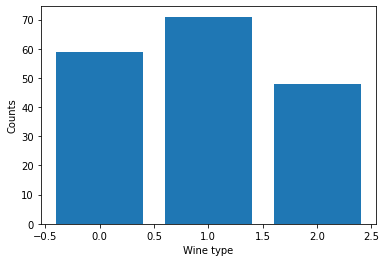

In [41]:
print(wine_dt.target)
target = wine_dt.target
target_counts = np.unique(target, return_counts = True)

plt.bar(target_counts[0], target_counts[1])
plt.xlabel('Wine type')
plt.ylabel('Counts')
plt.show();

In [42]:
# Get means of all numeric variables for each target
import pandas as pd
all_data = pd.DataFrame(wine_dt.data)
all_data['target'] = target
pd.pivot_table(all_data, index="target", aggfunc = np.mean)

,0,1,2,3,4,5,6,7,8,9,10,11,12
target,,,,,,,,,,,,,
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


In [45]:
# Build and visualise the model.
D_train, D_test, t_train, t_test = \
    train_test_split(wine_dt.data, target, test_size = 0.3, stratify = target)

decision_tree = DecisionTreeClassifier(max_depth = 4,
                                       criterion = 'entropy',
                                       random_state = 999)
decision_tree.fit(D_train, t_train)
print(decision_tree.score(X = D_test, y = t_test))

0.8888888888888888


***
www.featureranking.com